In [ ]:
"C:\Users\kshas\Downloads\Option4_Data\Option4_Data\Data\Electric_Production.csv"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv")

In [2]:
df.head()

,date,data
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [3]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# GRAPH 

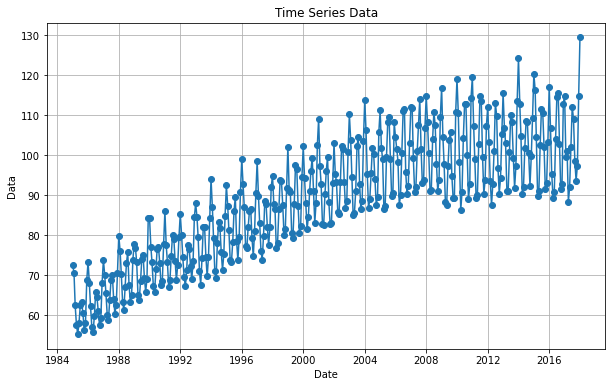

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df.index.to_numpy(), df['data'].to_numpy(), marker='o')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Data')
plt.grid(True)
plt.show()

# ADF

In [5]:
df

,data
date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


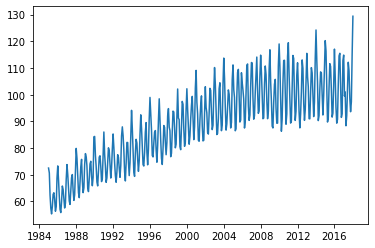

In [6]:
plt.plot(df["data"])

In [8]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Assuming df["data"] contains your time series data
X = df["data"].values
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.256990
p-value: 0.186215
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


# VISUALIZING 

<Figure size 864x576 with 0 Axes>

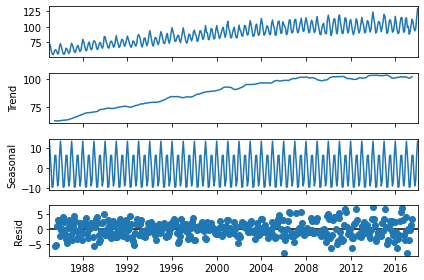

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = 'C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv'
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Ensure the data is monthly and interpolate missing values
data_interpolated = data.interpolate()

# Decomposing the time series
# Specify the period as 12 for monthly data
decomposition = seasonal_decompose(data_interpolated, model='additive', period=12)

# Plotting the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


# HOLT WINTERS MODEL

In [12]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

# Load the dataset
file_path = 'C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Interpolating missing values (if any)
data_interpolated = data.interpolate()

# Fitting the Holt-Winters multiplicative model
model = ExponentialSmoothing(data_interpolated, trend='add', seasonal='mul', seasonal_periods=12).fit()

# Forecasting for the next 1, 2, 3, ..., 12 years (12, 24, 36, ..., 144 months)
forecast_periods = [12 * year for year in range(1, 13)]
forecasts = {periods: model.forecast(periods) for periods in forecast_periods}

# Printing the forecasts
for periods, forecast in forecasts.items():
    print(f"Forecast for next {periods // 12} year(s):\n{forecast}\n")


C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forecast for next 1 year(s):
2018-02-01    117.766982
2018-03-01    109.949148
2018-04-01     98.871172
2018-05-01     99.419733
2018-06-01    109.633942
2018-07-01    119.114208
2018-08-01    119.327209
2018-09-01    108.194070
2018-10-01    100.198942
2018-11-01    103.777040
2018-12-01    119.612383
2019-01-01    128.591728
Freq: MS, dtype: float64

Forecast for next 2 year(s):
2018-02-01    117.766982
2018-03-01    109.949148
2018-04-01     98.871172
2018-05-01     99.419733
2018-06-01    109.633942
2018-07-01    119.114208
2018-08-01    119.327209
2018-09-01    108.194070
2018-10-01    100.198942
2018-11-01    103.777040
2018-12-01    119.612383
2019-01-01    128.591728
2019-02-01    119.236192
2019-03-01    111.319402
2019-04-01    100.102087
2019-05-01    100.656194
2019-06-01    110.996024
2019-07-01    120.592542
2019-08-01    120.806656
2019-09-01    109.534102
2019-10-01    101.438670
2019-11-01    105.059716
2019-12-01    121.089262
2020-01-01    130.177844
Freq: MS, dtype:

In [13]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to perform in-sample forecast and calculate metrics
def in_sample_forecast_metrics(data, years):
    months = years * 12  # Use months for monthly data
    train = data[:-months]
    test = data[-months:]

    model = ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=12).fit()
    predictions = model.predict(start=test.index[0], end=test.index[-1])

    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test, predictions)
    r2 = r2_score(test, predictions)
    
    return predictions, mse, rmse, mape, r2

# Load your dataset here
# Make sure 'data_interpolated' is defined and contains your monthly data
# For example: data_interpolated = ...

# Calculating metrics for 1, 2, 3, and 4 years
metrics_holt = {}
for years in range(1, 5):
    _, mse, rmse, mape, r2 = in_sample_forecast_metrics(data_interpolated, years)
    metrics_holt[years] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2
    }

# Print the metrics
for year, values in metrics_holt.items():
    print(f"{year}-Year Metrics:")
    for metric, value in values.items():
        print(f"  {metric}: {value}")
    print()


C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1-Year Metrics:
  MSE: 20.01644005485514
  RMSE: 4.47397363144388
  MAPE: 10.878053171844023
  R2: 0.833581389506637

2-Year Metrics:
  MSE: 18.167088685077232
  RMSE: 4.262286790571141
  MAPE: 10.434075397729
  R2: 0.8332075478030089

3-Year Metrics:
  MSE: 27.593692830615655
  RMSE: 5.252969905740528
  MAPE: 11.158625369056214
  R2: 0.729539899216274

4-Year Metrics:
  MSE: 70.55054144974412
  RMSE: 8.39943697218713
  MAPE: 12.609184056519606
  R2: 0.2609360080707408



# ACF PLOT

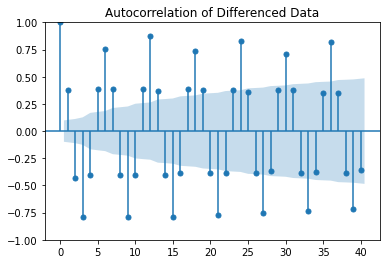

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Replace 'file_path' with the actual path to your CSV file
file_path = 'C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv'

# Load the dataset
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Assuming 'Electric_Production' is the name of the column with the time series data
# If your column is named differently, replace 'Electric_Production' with the correct column name

# Perform a first difference to remove trend
data['data'] = data['data'].diff().dropna()

# Plot the autocorrelation graph of the differenced data
plot_acf(data['data'].dropna(), lags=40)
plt.title('Autocorrelation of Differenced Data')
plt.show()


# PACF

<Figure size 864x432 with 0 Axes>

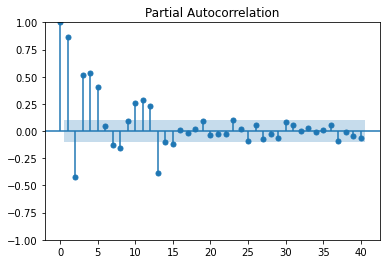

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
file_path = 'C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv'   # Replace with your file path
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Adjusting the date to the first day of the quarter
data_interpolated = data.interpolate()

# Plotting the Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(data_interpolated, lags=40)
plt.show()

In [18]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load your dataset
file_path = 'C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv'   # Replace with your file path
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Perform the ADF test on the original data
result = adfuller(data['data'])  # Replace 'your_column_name' with the name of your data column

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# If the time series is not stationary, difference it and perform the test again
if result[1] > 0.05:  # If p-value is greater than 0.05, the series is not stationary
    print('\nTime series is not stationary. Differencing the series...')
    data_diff = data['data'].diff().dropna()
    result_diff = adfuller(data_diff)
    
    print('\nADF Statistic (Differenced Series): %f' % result_diff[0])
    print('p-value (Differenced Series): %f' % result_diff[1])
    print('Critical Values (Differenced Series):')
    for key, value in result_diff[4].items():
        print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.256990
p-value: 0.186215
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571

Time series is not stationary. Differencing the series...

ADF Statistic (Differenced Series): -7.104891
p-value (Differenced Series): 0.000000
Critical Values (Differenced Series):
	1%: -3.448
	5%: -2.869
	10%: -2.571


ADF Statistic (Differenced Series): -7.104891
p-value (Differenced Series): 0.000000


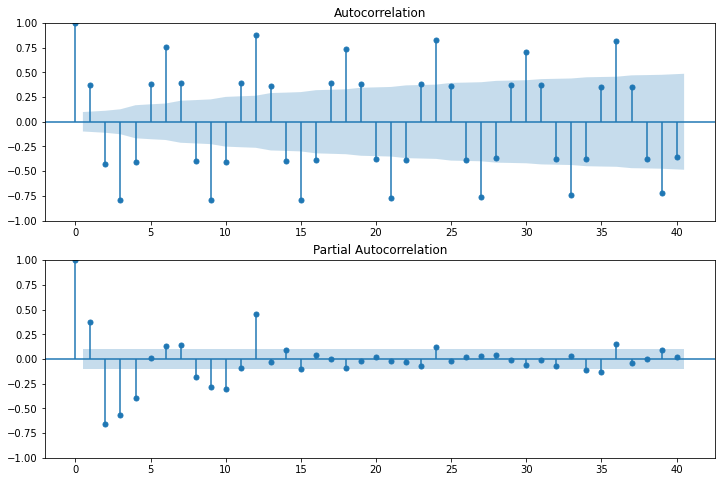

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load your dataset
file_path = 'C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Assuming 'Electric_Production' is the column name with the time series data
# Replace 'Electric_Production' with the correct column name

# Perform a first difference to remove trend
data_diff = data['data'].diff().dropna()

# Perform ADF test on the differenced data to confirm stationarity
result_diff = adfuller(data_diff)
print('ADF Statistic (Differenced Series): %f' % result_diff[0])
print('p-value (Differenced Series): %f' % result_diff[1])

# Plot the ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

# Plot the ACF on the first axis
plot_acf(data_diff, lags=40, ax=ax1)

# Plot the PACF on the second axis
plot_pacf(data_diff, lags=40, ax=ax2)

plt.show()
